In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("Copy of Telco_customer_churn.xlsx")
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [2]:
df.shape


(7043, 33)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
list(df.columns)


['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges',
 'Churn Label',
 'Churn Value',
 'Churn Score',
 'CLTV',
 'Churn Reason']

In [8]:
df.isnull().sum()


Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [9]:
df['Total Charges'].dtype


dtype('O')

In [10]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


In [11]:
df['Total Charges'].isnull().sum()


np.int64(11)

In [12]:
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)


C:\Users\nishant\AppData\Local\Temp\ipykernel_3488\2939802501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)


In [13]:
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())


In [14]:
df['Total Charges'].isnull().sum()


np.int64(0)

In [15]:
df['Total Charges'].dtype


dtype('float64')

In [16]:
df = df.drop(columns=['Churn Reason'])


In [17]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [19]:
df['Churn Value'].value_counts()


Churn Value
0    5174
1    1869
Name: count, dtype: int64

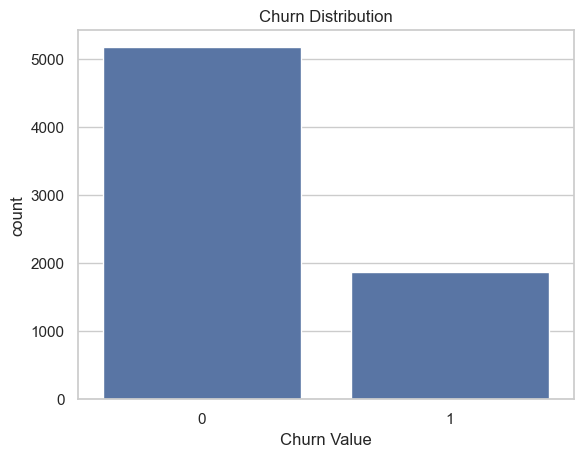

In [20]:
sns.countplot(x='Churn Value', data=df)
plt.title("Churn Distribution")
plt.show()


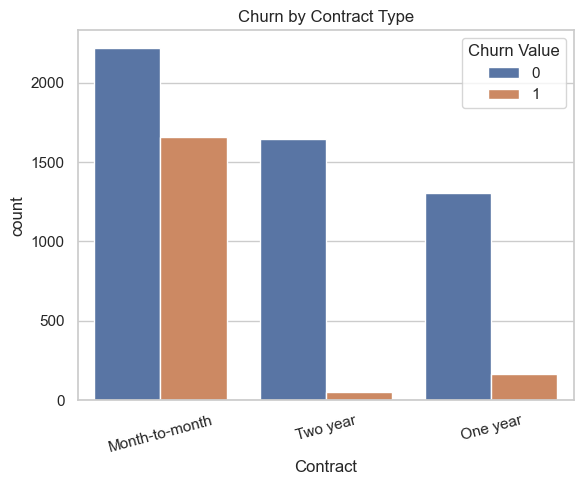

In [21]:
sns.countplot(x='Contract', hue='Churn Value', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.show()


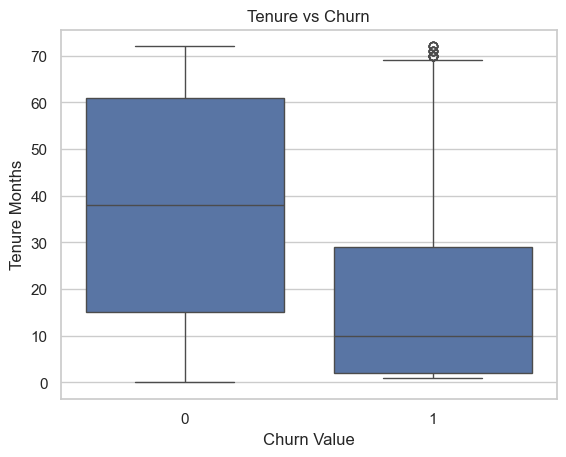

In [22]:
sns.boxplot(x='Churn Value', y='Tenure Months', data=df)
plt.title("Tenure vs Churn")
plt.show()


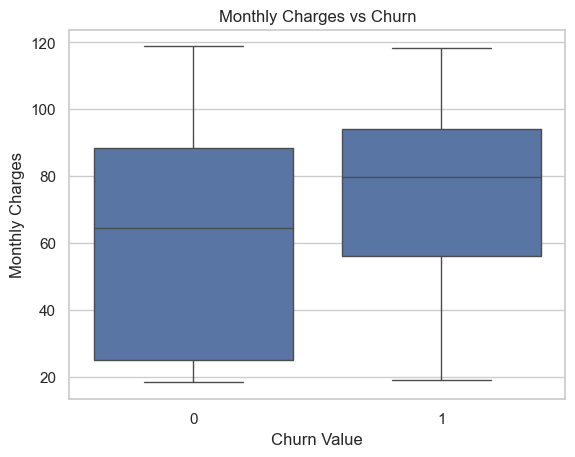

In [23]:
sns.boxplot(x='Churn Value', y='Monthly Charges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


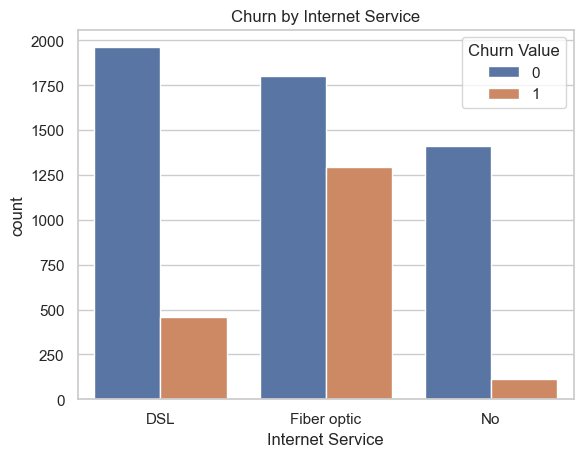

In [24]:
sns.countplot(x='Internet Service', hue='Churn Value', data=df)
plt.title("Churn by Internet Service")
plt.show()


In [25]:
binary_cols = [
    'Partner', 'Dependents', 'Phone Service', 'Paperless Billing',
    'Online Security', 'Online Backup', 'Device Protection',
    'Tech Support', 'Streaming TV', 'Streaming Movies'
]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [26]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [27]:
df = pd.get_dummies(
    df,
    columns=['Contract', 'Payment Method', 'Internet Service', 'Multiple Lines'],
    drop_first=True
)


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  7043 non-null   int64  
 1   Senior Citizen                          7043 non-null   object 
 2   Partner                                 7043 non-null   int64  
 3   Dependents                              7043 non-null   int64  
 4   Tenure Months                           7043 non-null   int64  
 5   Phone Service                           7043 non-null   int64  
 6   Online Security                         5517 non-null   float64
 7   Online Backup                           5517 non-null   float64
 8   Device Protection                       5517 non-null   float64
 9   Tech Support                            5517 non-null   float64
 10  Streaming TV                            5517 non-null   floa

In [29]:
df.head()


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Online Security,Online Backup,Device Protection,Tech Support,...,CLTV,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Internet Service_Fiber optic,Internet Service_No,Multiple Lines_No phone service,Multiple Lines_Yes
0,1,No,0,0,2,1,1.0,1.0,0.0,0.0,...,3239,False,False,False,False,True,False,False,False,False
1,0,No,0,1,2,1,0.0,0.0,0.0,0.0,...,2701,False,False,False,True,False,True,False,False,False
2,0,No,0,1,8,1,0.0,0.0,1.0,0.0,...,5372,False,False,False,True,False,True,False,False,True
3,0,No,1,1,28,1,0.0,0.0,1.0,1.0,...,5003,False,False,False,True,False,True,False,False,True
4,1,No,0,1,49,1,0.0,1.0,1.0,0.0,...,5340,False,False,False,False,False,True,False,False,True


In [30]:
X = df.drop(columns=['Churn Value', 'Churn Label'])
y = df['Churn Value']


In [31]:
X.shape, y.shape


((7043, 26), (7043,))

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


ValueError: could not convert string to float: 'No'

In [34]:
X_train.dtypes[X_train.dtypes == 'object']


Senior Citizen    object
dtype: object

In [35]:
df['Senior Citizen'] = df['Senior Citizen'].astype(int)


ValueError: invalid literal for int() with base 10: 'No'

In [36]:
df['Senior Citizen'].value_counts()


Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

In [37]:
df['Senior Citizen'] = df['Senior Citizen'].map({'Yes': 1, 'No': 0})


In [38]:
df['Senior Citizen'] = pd.to_numeric(df['Senior Citizen'], errors='coerce')


In [39]:
df['Senior Citizen'] = df['Senior Citizen'].replace({'Yes': 1, 'No': 0})
df['Senior Citizen'] = pd.to_numeric(df['Senior Citizen'], errors='coerce')


In [40]:
df['Senior Citizen'].dtype


dtype('int64')

In [41]:
df['Senior Citizen'].isnull().sum()


np.int64(0)

In [42]:
X = df.drop(columns=['Churn Value', 'Churn Label'])
y = df['Churn Value']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [43]:
X_train.dtypes[X_train.dtypes == 'object']


Series([], dtype: object)

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [45]:
X_train.isnull().sum().sum()


np.int64(7284)

In [46]:
X_train.isnull().sum().sort_values(ascending=False).head(10)


Device Protection    1214
Tech Support         1214
Online Backup        1214
Online Security      1214
Streaming Movies     1214
Streaming TV         1214
Phone Service           0
Tenure Months           0
Senior Citizen          0
Gender                  0
dtype: int64

In [47]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())


In [48]:
import numpy as np
np.isinf(X_train).sum().sum()


np.int64(0)

In [49]:
X_train.isnull().sum().sum()
np.isinf(X_train).sum().sum()


np.int64(0)

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


C:\Users\nishant\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
lr_scaled = LogisticRegression(max_iter=2000)
lr_scaled.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000)

In [53]:
y_pred = lr.predict(X_test)


In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9183818310858765

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1035
           1       0.84      0.86      0.85       374

    accuracy                           0.92      1409
   macro avg       0.89      0.90      0.90      1409
weighted avg       0.92      0.92      0.92      1409



In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[972,  63],
       [ 52, 322]])

In [57]:
from sklearn.metrics import roc_auc_score

y_prob = lr.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob)


np.float64(0.9735384535896044)

In [58]:
importance = pd.Series(
    lr.coef_[0],
    index=X.columns
).sort_values(ascending=False)

importance.head(10)


Internet Service_Fiber optic    2.596164
Streaming TV                    1.186086
Streaming Movies                0.942826
Device Protection               0.540011
Paperless Billing               0.495124
Multiple Lines_Yes              0.444801
Partner                         0.339346
Tech Support                    0.309124
Online Security                 0.219605
Online Backup                   0.191286
dtype: float64

In [60]:
df.to_csv("telco_churn_final.csv", index=False)
